In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = np.loadtxt(open("./data.txt","r"))
x = data[:,0].reshape(-1, 1)
y = data[:,1].reshape(-1, 1)

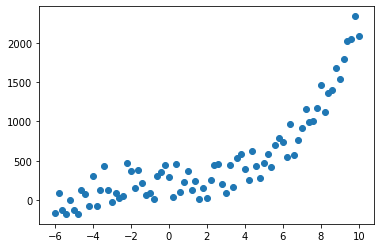

In [3]:
plt.scatter(x, y)
plt.show()

### 1. Partition all data randomly into 10 folds and produce 10 different training-validation set pairs

In [4]:
kf = KFold(n_splits=10, shuffle=True, random_state = 2353464 )
x_train = []
x_test = []
y_train = []
y_test = []
for k,(train_index, test_index) in enumerate(kf.split(x)):
    x_train.append(x[train_index])
    x_test.append(x[test_index])
    y_train.append(y[train_index])
    y_test.append(y[test_index])
    print("SET", k , "TRAIN :", x_train[k].T, "TEST :", x_test[k].T, "\n")

SET 0 TRAIN : [[-6.  -5.8 -5.6 -5.2 -5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.
  -2.8 -2.6 -2.4 -2.2 -2.  -1.6 -1.4 -1.2 -1.  -0.8 -0.4 -0.2  0.   0.2
   0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.
   3.2  3.6  4.   4.2  4.4  4.6  5.   5.4  5.6  6.   6.2  6.4  6.6  6.8
   7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6
   9.8 10. ]] TEST : [[-5.4 -3.2 -1.8 -0.6  3.4  3.8  4.8  5.2  5.8]] 

SET 1 TRAIN : [[-6.  -5.4 -5.2 -5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.
  -2.6 -2.4 -2.2 -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2
   0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  3.   3.2
   3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.
   6.2  6.4  6.6  6.8  7.   7.4  7.6  7.8  8.   8.2  8.4  8.8  9.2  9.4
   9.6  9.8 10. ]] TEST : [[-5.8 -5.6 -2.8 -2.   2.8  7.2  8.6  9. ]] 

SET 2 TRAIN : [[-6.  -5.8 -5.6 -5.4 -5.2 -5.  -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2
  -3.  -2.8 -2.6 -2.4 -2.2

### 2. Normalize your training inputs and outputs by using training sample mean and std deviation

In [5]:
for k in range(len(x_train)):
    std_scale = preprocessing.StandardScaler().fit(x_train[k])
    x_train[k], x_test[k] = std_scale.transform(x_train[k]), std_scale.transform(x_test[k])
    print("SET", k , "TRAIN :", x_train[k].T, "TEST :", x_test[k].T, "\n")

SET 0 TRAIN : [[-1.69889132 -1.6568569  -1.61482248 -1.53075363 -1.4887192  -1.44668478
  -1.40465035 -1.36261593 -1.3205815  -1.27854708 -1.23651265 -1.19447823
  -1.15244381 -1.06837496 -1.02634053 -0.98430611 -0.94227168 -0.90023726
  -0.85820283 -0.77413399 -0.73209956 -0.69006514 -0.64803071 -0.60599629
  -0.52192744 -0.47989301 -0.43785859 -0.39582416 -0.35378974 -0.31175532
  -0.26972089 -0.22768647 -0.18565204 -0.14361762 -0.10158319 -0.05954877
  -0.01751434  0.02452008  0.06655451  0.10858893  0.15062335  0.19265778
   0.2346922   0.31876105  0.4028299   0.44486433  0.48689875  0.52893318
   0.61300202  0.69707087  0.7391053   0.82317415  0.86520857  0.907243
   0.94927742  0.99131185  1.03334627  1.07538069  1.11741512  1.15944954
   1.20148397  1.24351839  1.28555282  1.32758724  1.36962167  1.41165609
   1.45369051  1.49572494  1.53775936  1.57979379  1.62182821  1.66386264]] TEST : [[-1.57278805 -1.11040938 -0.81616841 -0.56396186  0.27672663  0.36079548
   0.5709676   0.

### 3. For each of the 10 training sets, compute the weights that minimizes the training error for each hypothesis
(a) g(x;w) = w0 + xw1

(b) g(x;w) = w0 + xw1 + x2w2 + x3w3

(c) g(x;w) = w0 + x1w1 + x2w2 + x3w3 + x4w4 + x5w5

(d) g(x;w) = w0 + x1w1 + x2w2 + x3w3 + x4w4 + x5w5 + ... + x50w50

In [6]:
def gradient_descent(X, y, w, learning_rate, iterations):
    error_history = np.zeros(iterations)
    w_history = np.zeros((iterations,len(w)))
    n = len(y)
    for it in range(iterations):        
        prediction = np.dot(X,w)
        w = w -  learning_rate * (2/n) * np.dot(X.T,(prediction - y))
        w_history[it,:] =w.T
        error_history[it]  = error(w,X,y)
    return w, w_history, error_history

In [7]:
def error(w,X,y):  
    n = len(y)
    predictions = np.dot(X,w)
    error = (1/n) * np.sum(np.square(predictions-y))
    return error

In [8]:
W_a = np.zeros((kf.get_n_splits(),2,1))
W_b = np.zeros((kf.get_n_splits(),4,1))
W_c = np.zeros((kf.get_n_splits(),6,1))
W_d = np.zeros((kf.get_n_splits(),51,1))

training_error_a = np.zeros(kf.get_n_splits())
training_error_b = np.zeros(kf.get_n_splits())
training_error_c = np.zeros(kf.get_n_splits())
training_error_d = np.zeros(kf.get_n_splits())

testing_error_a = np.zeros(kf.get_n_splits())
testing_error_b = np.zeros(kf.get_n_splits())
testing_error_c = np.zeros(kf.get_n_splits())
testing_error_d = np.zeros(kf.get_n_splits())

for k in range(len(x_train)):
        
    #Convert x_train, x_test to matrix form for each hypothesis
    X_train_a = np.c_[np.ones(len(x_train[k])),x_train[k]]
    X_test_a = np.c_[np.ones(len(x_test[k])),x_test[k]]
    
    ft_poly3=PolynomialFeatures(degree=3)
    X_train_b=ft_poly3.fit_transform(x_train[k])
    X_test_b=ft_poly3.fit_transform(x_test[k])
        
    ft_poly5=PolynomialFeatures(degree=5)
    X_train_c=ft_poly5.fit_transform(x_train[k])
    X_test_c=ft_poly5.fit_transform(x_test[k])
        
    ft_poly50=PolynomialFeatures(degree=50)
    X_train_d=ft_poly50.fit_transform(x_train[k])
    X_test_d=ft_poly50.fit_transform(x_test[k])
    
    #Initialize w for each hypothesis
    
    W_a[k] = np.random.randn(2,1)
    W_b[k] = np.random.randn(4,1)
    W_c[k] = np.random.randn(6,1)
    W_d[k] = np.random.randn(51,1)
    
        
    #Run GD function for each hypothesis
    W_a[k], w_hist_a, error_a = gradient_descent(X_train_a,y_train[k],W_a[k],0.05,100)
    W_b[k], w_hist_b, error_b = gradient_descent(X_train_b,y_train[k],W_b[k],0.01,100)
    W_c[k], w_hist_c, error_c = gradient_descent(X_train_c,y_train[k],W_c[k],0.005,1000)
    W_d[k], w_hist_d, error_d = gradient_descent(X_train_d,y_train[k],W_d[k],5e-25,10000)         
    
    
    ##Get training and testing error for each hypothesis    
    training_error_a[k] = error(W_a[k], X_train_a, y_train[k])
    training_error_b[k] = error(W_b[k], X_train_b, y_train[k])
    training_error_c[k] = error(W_c[k], X_train_c, y_train[k])
    training_error_d[k] = error(W_d[k], X_train_d, y_train[k])
    
    testing_error_a[k] = error(W_a[k], X_test_a, y_test[k])
    testing_error_b[k] = error(W_b[k], X_test_b, y_test[k])
    testing_error_c[k] = error(W_c[k], X_test_c, y_test[k])
    testing_error_d[k] = error(W_d[k], X_test_d, y_test[k])
    

In [9]:
print ("A - Weights : ", W_a ,"\n")
print ("B - Weights : ", W_b,"\n")
print ("C - Weights : ", W_c,"\n")
print ("D - Weights : ", W_d,"\n")

A - Weights :  [[[533.29500714]
  [509.18997322]]

 [[499.6087508 ]
  [475.264057  ]]

 [[492.15209594]
  [474.27314687]]

 [[484.44905105]
  [485.09801953]]

 [[488.38906285]
  [481.13973953]]

 [[524.85362726]
  [495.44444119]]

 [[542.52630546]
  [492.22881138]]

 [[522.44005094]
  [483.37677486]]

 [[495.5670767 ]
  [475.88381249]]

 [[504.58427433]
  [479.54234608]]] 

B - Weights :  [[[225.06291804]
  [117.53219016]
  [297.60402474]
  [218.03736185]]

 [[217.80955753]
  [100.32793239]
  [267.98393556]
  [198.94980681]]

 [[209.5327935 ]
  [ 91.13240018]
  [252.89300988]
  [196.11472741]]

 [[203.87581026]
  [108.28733418]
  [273.93759838]
  [210.36828214]]

 [[209.94530814]
  [ 95.27918588]
  [245.77731413]
  [197.5110323 ]]

 [[227.65081755]
  [113.61680973]
  [285.93991803]
  [214.282557  ]]

 [[237.75868986]
  [132.21628485]
  [313.89947456]
  [202.27295052]]

 [[234.97988939]
  [122.92797354]
  [296.81441749]
  [215.86053016]]

 [[216.1857558 ]
  [102.45486084]
  [270.3551452

### 4. For the hypothesis that minimizes the training error
(a) Plot the errorbar (i.e., the mean and std/sqrt(10)) of training and validation errors (you can
use errorbar function, (Hint: x axis = 1,: : : , 4 (hypothesis class), y axis = mean error over 10
folds)).

<ErrorbarContainer object of 3 artists>

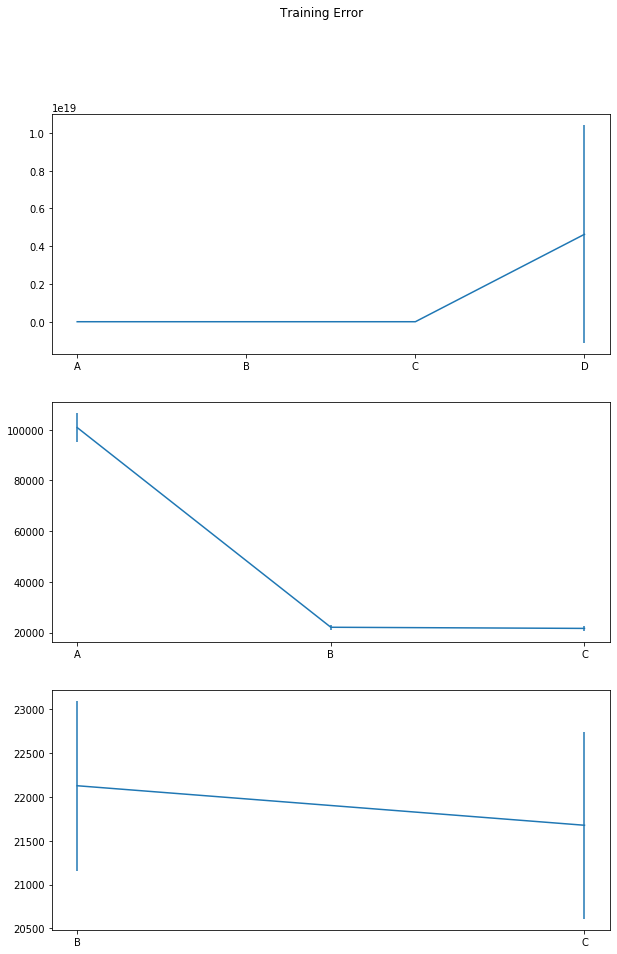

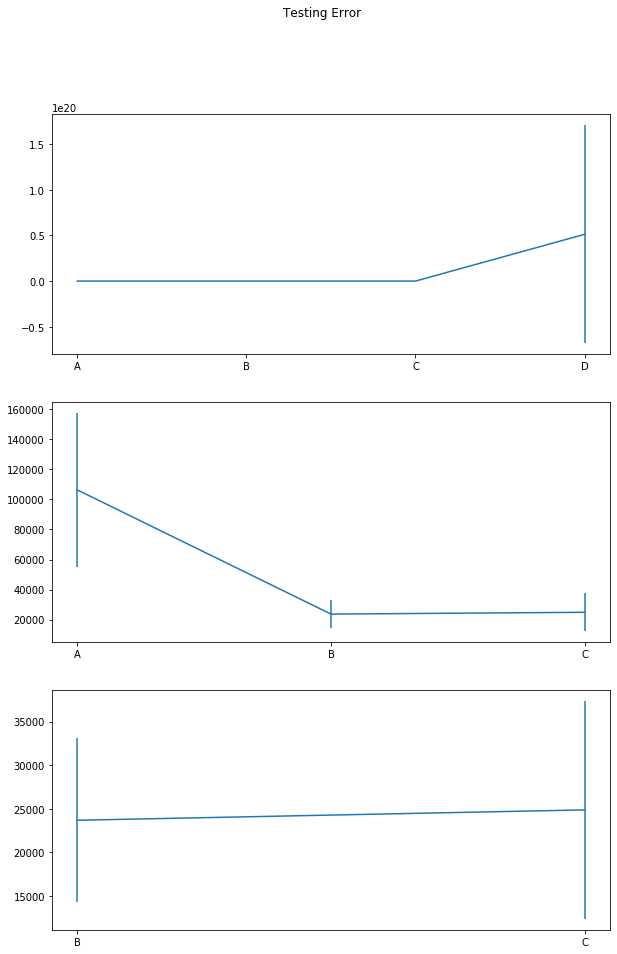

In [10]:
hypothesis = ['A', 'B', 'C', 'D']
error_mean_training = [training_error_a.mean(), training_error_b.mean(), training_error_c.mean(), training_error_d.mean()]
error_std_training = [training_error_a.std(), training_error_b.std(), training_error_c.std(),training_error_d.std()]

figure, ax = plt.subplots(3, figsize=(10,15))
figure.suptitle('Training Error')
ax[0].errorbar(hypothesis, error_mean_training, yerr= error_std_training)
ax[1].errorbar(hypothesis[:3], error_mean_training[:3], yerr= error_std_training[:3])
ax[2].errorbar(hypothesis[1:3], error_mean_training[1:3], yerr= error_std_training[1:3])

error_mean_testing = [testing_error_a.mean(), testing_error_b.mean(), testing_error_c.mean(), testing_error_d.mean()]
error_std_testing = [testing_error_a.std(), testing_error_b.std(), testing_error_c.std(),testing_error_d.std()]

figure, ax = plt.subplots(3, figsize=(10,15))
figure.suptitle('Testing Error')
ax[0].errorbar(hypothesis, error_mean_testing, yerr= error_std_testing)
ax[1].errorbar(hypothesis[:3], error_mean_testing[:3], yerr= error_std_testing[:3])
ax[2].errorbar(hypothesis[1:3], error_mean_testing[1:3], yerr= error_std_testing[1:3])

(b) Plot the training input and outputs and the minimum training error hypothesis outputs for each
hypothesis class above (4 plots, 10 hypotheses on each plot).

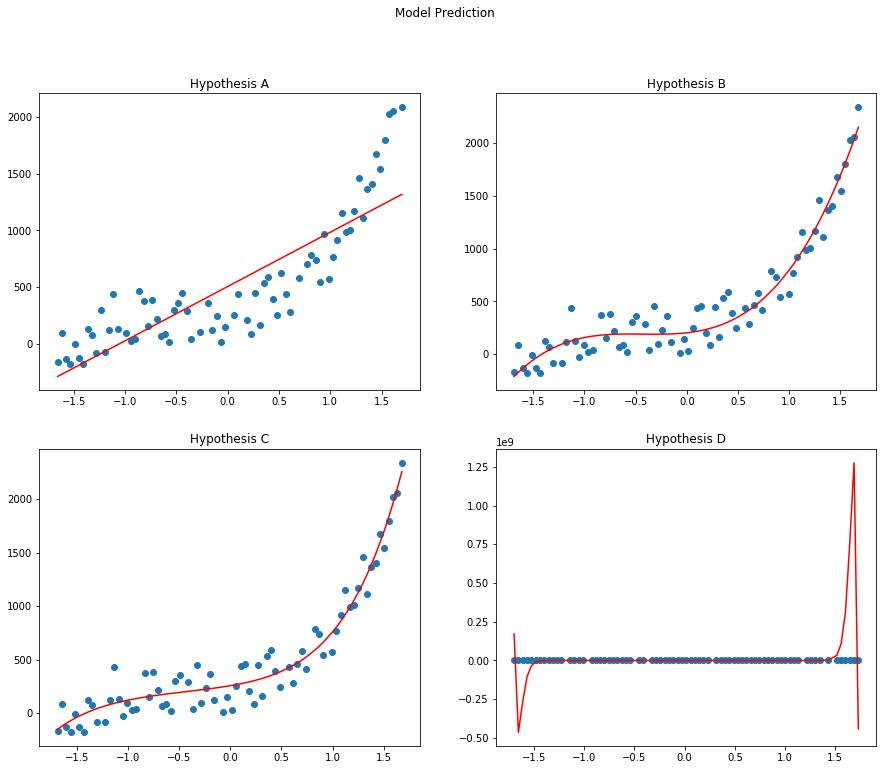

In [11]:
#Get predictions with W with min training error for each hypothesis
index_a = np.argmin(training_error_a)
index_b = np.argmin(training_error_b)
index_c = np.argmin(training_error_c)
index_d = np.argmin(training_error_d)

#Convert x_train, x_test to matrix form for each hypothesis
X_train_a = np.c_[np.ones(len(x_train[k])),x_train[index_a]]
    
ft_poly3=PolynomialFeatures(degree=3)
X_train_b=ft_poly3.fit_transform(x_train[index_b])
        
ft_poly5=PolynomialFeatures(degree=5)
X_train_c=ft_poly5.fit_transform(x_train[index_c])
        
ft_poly50=PolynomialFeatures(degree=50)
X_train_d=ft_poly50.fit_transform(x_train[index_d])
    
predictions_a = np.dot(X_train_a,W_a[index_a])
predictions_b = np.dot(X_train_b,W_b[index_b])
predictions_c = np.dot(X_train_c,W_c[index_c])
predictions_d = np.dot(X_train_d,W_d[index_d])

figure, ax = plt.subplots(2,2, figsize=(15,12))
figure.suptitle('Model Prediction')

ax[0,0].set_title('Hypothesis A')
ax[0,0].scatter(x_train[index_a], y_train[index_a])
ax[0,0].plot(x_train[index_a], predictions_a, 'red')
ax[0,1].set_title('Hypothesis B')
ax[0,1].scatter(x_train[index_b], y_train[index_b])
ax[0,1].plot(x_train[index_b], predictions_b, 'red')
ax[1,0].set_title('Hypothesis C')
ax[1,0].scatter(x_train[index_c], y_train[index_c])
ax[1,0].plot(x_train[index_c], predictions_c, 'red')
ax[1,1].set_title('Hypothesis D')
ax[1,1].scatter(x_train[index_d], y_train[index_d])
ax[1,1].plot(x_train[index_d], predictions_d, 'red')
   

### 5. Which hypothesis class would you choose among (a),: : : , (d) and why?

We can observe on the graphs that hypothesis B and C have lowest training and testing errors for each of the training sets. For training sets, C fits the data better than B. For testing sets, we get that B performs better than C. I would choose hypothesis B, because it performed better on new data and its standard deviation for testing errors is also the smallest. Also, we can see that the curves fitted by B and C are very similar and according to the Occam's razor principle, we should favor the simpler model in scenarios were we get similar performance.